# Import

In [9]:
# Basic
import pandas as pd
import numpy as np

# Data
from catboost import datasets

# Model
from robusta.testing import get_estimator

# Crossval
from sklearn.model_selection import RepeatedStratifiedKFold
from robusta.crossval import *

# Plot
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib notebook

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

# Data

In [2]:
X_train, X_test = datasets.amazon()

X_test.index = X_test.pop('id')
X_train.index.name = 'id'

y_train = X_train.pop('ACTION')

X_train

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
id,,,,,,,,,
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...
32764,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,34924,28805,117961,118327,120299,124922,152038,118612,124924


# Task

In [3]:
cv = RepeatedStratifiedKFold(3, 5)
scoring = 'roc_auc'

# Cross-Validation

In [4]:
modelA = get_estimator('LGB', 'classifier', num_leaves=13)

cv = RepeatedStratifiedKFold(3, 3)

resultA = crossval(modelA, cv, X_train, y_train, X_new=X_test, scoring=scoring, 
                   method='predict_proba', train_score=True, verbose=2,
                   return_estimator=True)

[07:16:07]  LGBMClassifier

[07:16:07]  TRN 1:   0.9027    VAL 1:   0.7876
[07:16:08]  TRN 2:   0.8934    VAL 2:   0.8015
[07:16:08]  TRN 3:   0.8988    VAL 3:   0.7821
[07:16:08]  TRN 4:   0.8993    VAL 4:   0.7941
[07:16:09]  TRN 5:   0.8973    VAL 5:   0.8023
[07:16:09]  TRN 6:   0.8973    VAL 6:   0.7932
[07:16:09]  TRN 7:   0.8952    VAL 7:   0.8121
[07:16:09]  TRN 8:   0.8989    VAL 8:   0.7919
[07:16:10]  TRN 9:   0.8974    VAL 9:   0.7876

[07:16:10]  TRAIN:   0.8978 ± 0.0025
[07:16:10]  VALID:   0.7947 ± 0.0087



In [5]:
modelB = get_estimator('LGB', 'classifier', num_leaves=15)

cv = RepeatedStratifiedKFold(3, 3)

resultB = crossval(modelB, cv, X_train, y_train, X_new=X_test, scoring=scoring, 
                   method='predict_proba', train_score=True, verbose=2,
                   return_estimator=True)

[07:16:10]  LGBMClassifier

[07:16:11]  TRN 1:   0.9144    VAL 1:   0.7973
[07:16:11]  TRN 2:   0.9096    VAL 2:   0.8126
[07:16:11]  TRN 3:   0.9170    VAL 3:   0.7865
[07:16:12]  TRN 4:   0.9138    VAL 4:   0.7992
[07:16:12]  TRN 5:   0.9090    VAL 5:   0.8042
[07:16:12]  TRN 6:   0.9116    VAL 6:   0.7945
[07:16:13]  TRN 7:   0.9055    VAL 7:   0.8125
[07:16:13]  TRN 8:   0.9104    VAL 8:   0.7917
[07:16:13]  TRN 9:   0.9093    VAL 9:   0.7958

[07:16:14]  TRAIN:   0.9112 ± 0.0032
[07:16:14]  VALID:   0.7994 ± 0.0084



In [6]:
modelC = get_estimator('LGB', 'classifier', num_leaves=42)

cv = RepeatedStratifiedKFold(3, 3)

resultC = crossval(modelC, cv, X_train, y_train, X_new=X_test, scoring=scoring, 
                   method='predict_proba', train_score=True, verbose=2,
                   return_estimator=True)

[07:16:14]  LGBMClassifier

[07:16:14]  TRN 1:   0.9787    VAL 1:   0.8218
[07:16:15]  TRN 2:   0.9728    VAL 2:   0.8341
[07:16:15]  TRN 3:   0.9765    VAL 3:   0.8154
[07:16:16]  TRN 4:   0.9768    VAL 4:   0.8361
[07:16:16]  TRN 5:   0.9762    VAL 5:   0.8265
[07:16:16]  TRN 6:   0.9780    VAL 6:   0.8219
[07:16:17]  TRN 7:   0.9760    VAL 7:   0.8457
[07:16:17]  TRN 8:   0.9779    VAL 8:   0.8269
[07:16:18]  TRN 9:   0.9777    VAL 9:   0.8307

[07:16:18]  TRAIN:   0.9767 ± 0.0016
[07:16:18]  VALID:   0.8288 ± 0.0085



# Model Comparison

## t-test

<IPython.core.display.Javascript object>


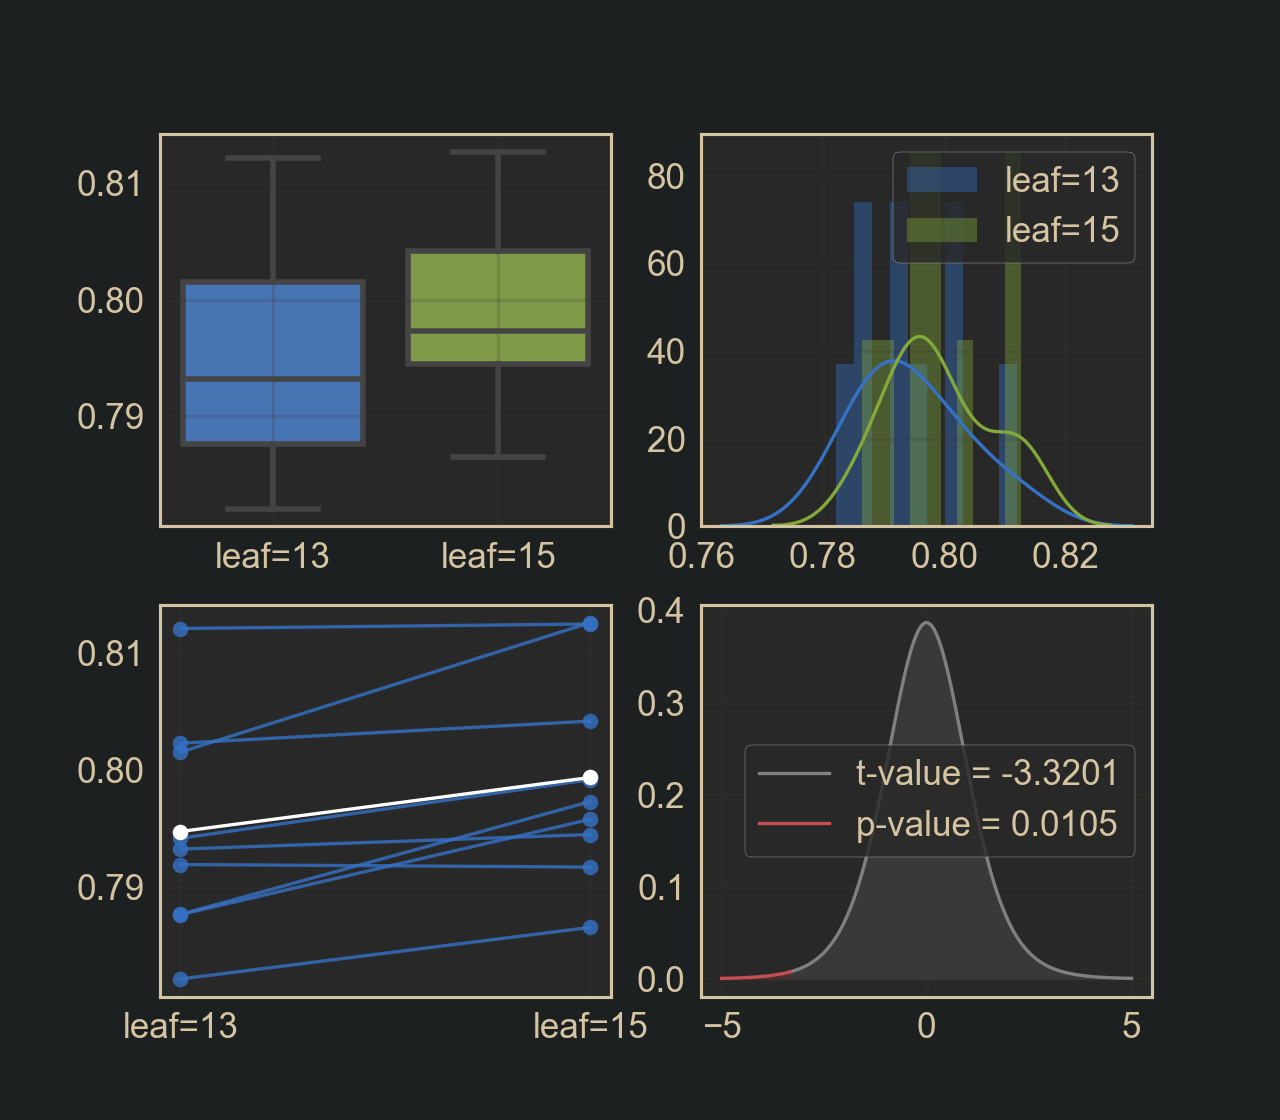

(-3.3201155627891215, 0.010538262381220407)

In [10]:
compare_ttest(resultA, resultB, labels=['leaf=13', 'leaf=15'])

## ROC-AUC

<IPython.core.display.Javascript object>


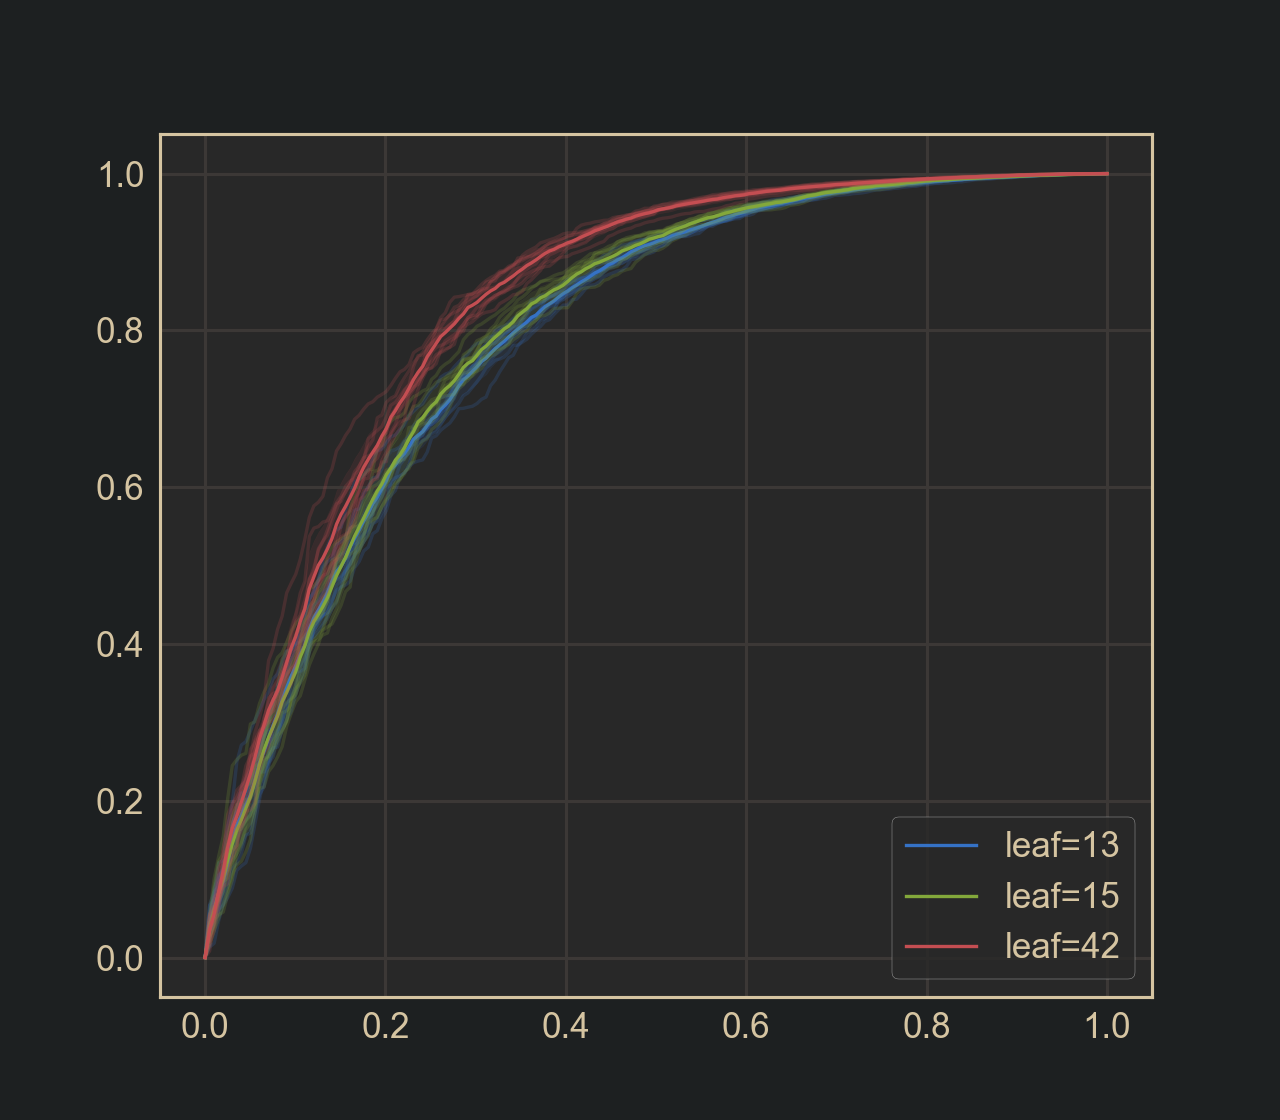

In [11]:
aucs = compare_roc_auc([resultA, resultB, resultC], X_train, y_train, 
                       labels=['leaf=13', 'leaf=15', 'leaf=42'])